In [674]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [675]:
c_positif = [0.9,0.8,0.9,0.2,0.7,0.3,0.6,0.7,0.5,0.4]
c_negatif = [0.2,0.7,0.3,0.2,0.5,0.4,0.7,0.1,0.6,0.3]


In [676]:
def matrices_confusion(c_positif, c_negatif, start, stop, step):
    TP = [];FP = [];TN = [];FN = [];seuils = []
    s = start
    while s <= stop:
        tp = 0;fn = 0
        for i in c_positif:
            if i >= s:
                tp += 1
            elif i <= s:
                fn += 1
        fp = 0;tn = 0
        for i in c_negatif:
            if i >= s:
                fp += 1
            elif i <= s:
                tn += 1
        TP.append(tp); FP.append(fp); TN.append(tn); FN.append(fn);seuils.append(s)
        s = round(s + step, 2) 
    return TP, FP, TN, FN, seuils

TP, FP, TN, FN, seuils = matrices_confusion(c_positif, c_negatif,0.05,0.95,0.1)

In [677]:

def rates(TP, FP, TN, FN, c_positif, c_negatif):
    TPR = [];FPR = [];FNR = [];TNR = [];precision = [];rappel = []
    for i in range(len(TP)):
        TPR.append(TP[i] / len(c_positif))
        FPR.append(FP[i] / len(c_negatif))
        FNR.append(FN[i] / len(c_positif))
        TNR.append(TN[i] / len(c_negatif))
        rappel.append(TP[i] / (TP[i] + FN[i]))
        
        if TP[i] + FP[i] != 0:
            precision.append(TP[i] / (TP[i] + FP[i]))
        else:
            precision.append(0)
            
        
    return TPR, FPR, FNR, TNR, precision, rappel

TPR, FPR, FNR, TNR, precision, rappel = rates(TP, FP, TN, FN, c_positif, c_negatif)



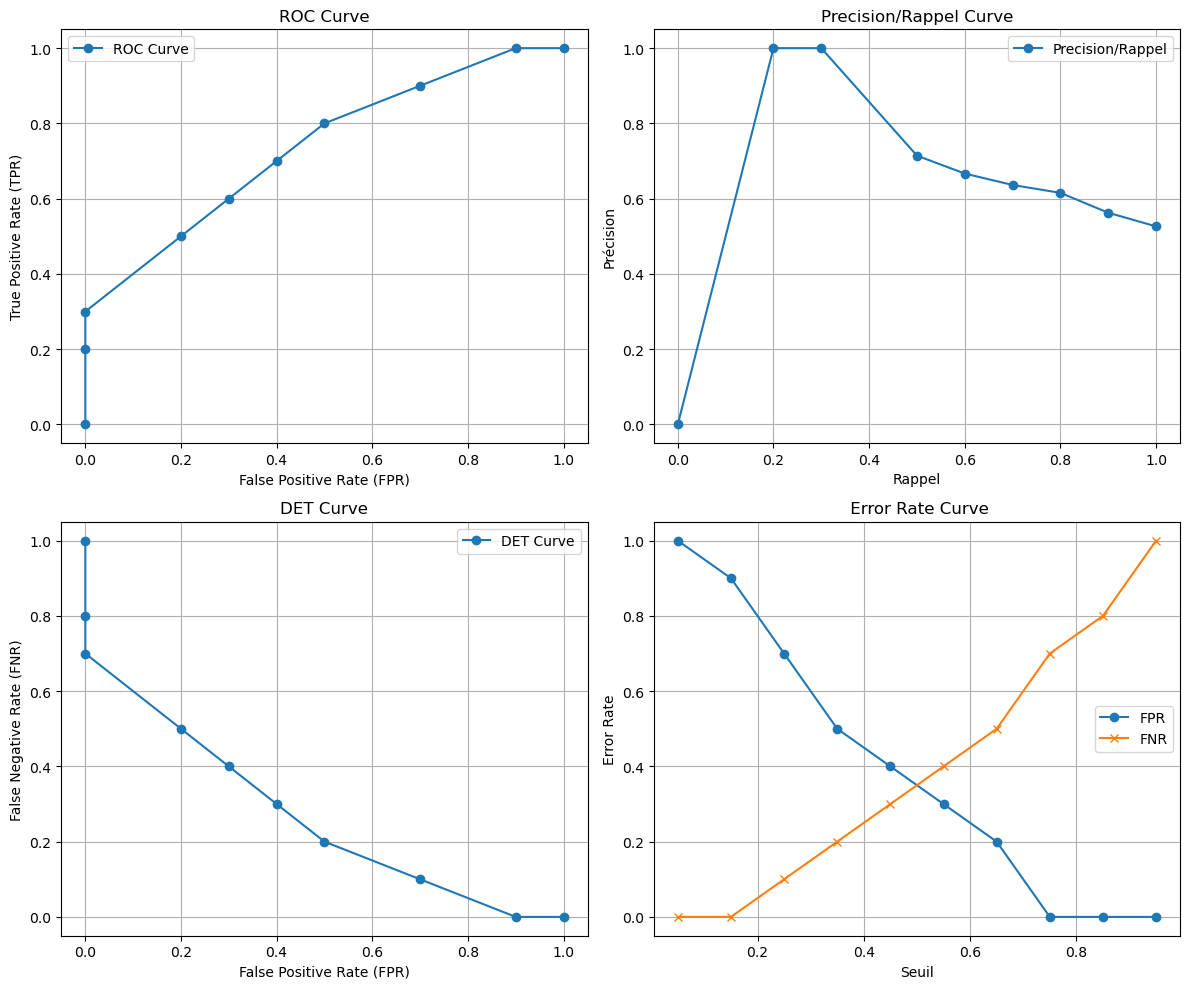

In [678]:
def plot_performance_curves(FPR, TPR, rappel, precision, FNR, seuils):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    axs[0, 0].plot(FPR, TPR, marker='o', label="ROC Curve")
    axs[0, 0].set_xlabel('False Positive Rate (FPR)')
    axs[0, 0].set_ylabel('True Positive Rate (TPR)')
    axs[0, 0].set_title('ROC Curve')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    axs[0, 1].plot(rappel[1:], precision[1:], marker='o', label="Precision/Rappel")
    axs[0, 1].set_xlabel('Rappel')
    axs[0, 1].set_ylabel('Précision')
    axs[0, 1].set_title('Precision/Rappel Curve')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    axs[1, 0].plot(FPR, FNR, marker='o', label="DET Curve")
    axs[1, 0].set_xlabel('False Positive Rate (FPR)')
    axs[1, 0].set_ylabel('False Negative Rate (FNR)')
    axs[1, 0].set_title('DET Curve')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    axs[1, 1].plot(seuils, FPR, marker='o', label="FPR")
    axs[1, 1].plot(seuils, FNR, marker='x', label="FNR")
    axs[1, 1].set_xlabel('Seuil')
    axs[1, 1].set_ylabel('Error Rate')
    axs[1, 1].set_title(' Error Rate Curve')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()


plot_performance_curves(FPR, TPR, rappel, precision, FNR, seuils)


In [679]:
print(FPR)
print(FNR)

[1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 1.0]


EXERCICE 2

In [681]:
c_pos=[0.95, 0.80, 0.60, 0.98, 0.70, 0.92, 0.65, 0.75, 0.40, 0.88, 
                  0.85, 0.93, 0.62, 0.59, 0.68, 0.46, 0.90, 0.88, 0.76, 0.58, 
                  0.47, 0.93, 0.82, 0.97, 0.74, 0.45, 0.91, 0.79, 0.53, 0.68, 
                  0.68, 0.82, 0.62]
c_neg=[0.25, 0.15, 0.10, 0.35, 0.20, 0.08, 0.30, 0.40, 0.45, 0.60, 
                  0.28, 0.12, 0.38, 0.55, 0.22, 0.14, 0.32]


In [682]:
TP, FP, TN, FN, seuils = matrices_confusion(c_pos, c_neg,0.055,0.955,0.05)

In [683]:
TPR, FPR, FNR, TNR, precision, rappel = rates(TP, FP, TN, FN, c_pos, c_neg)


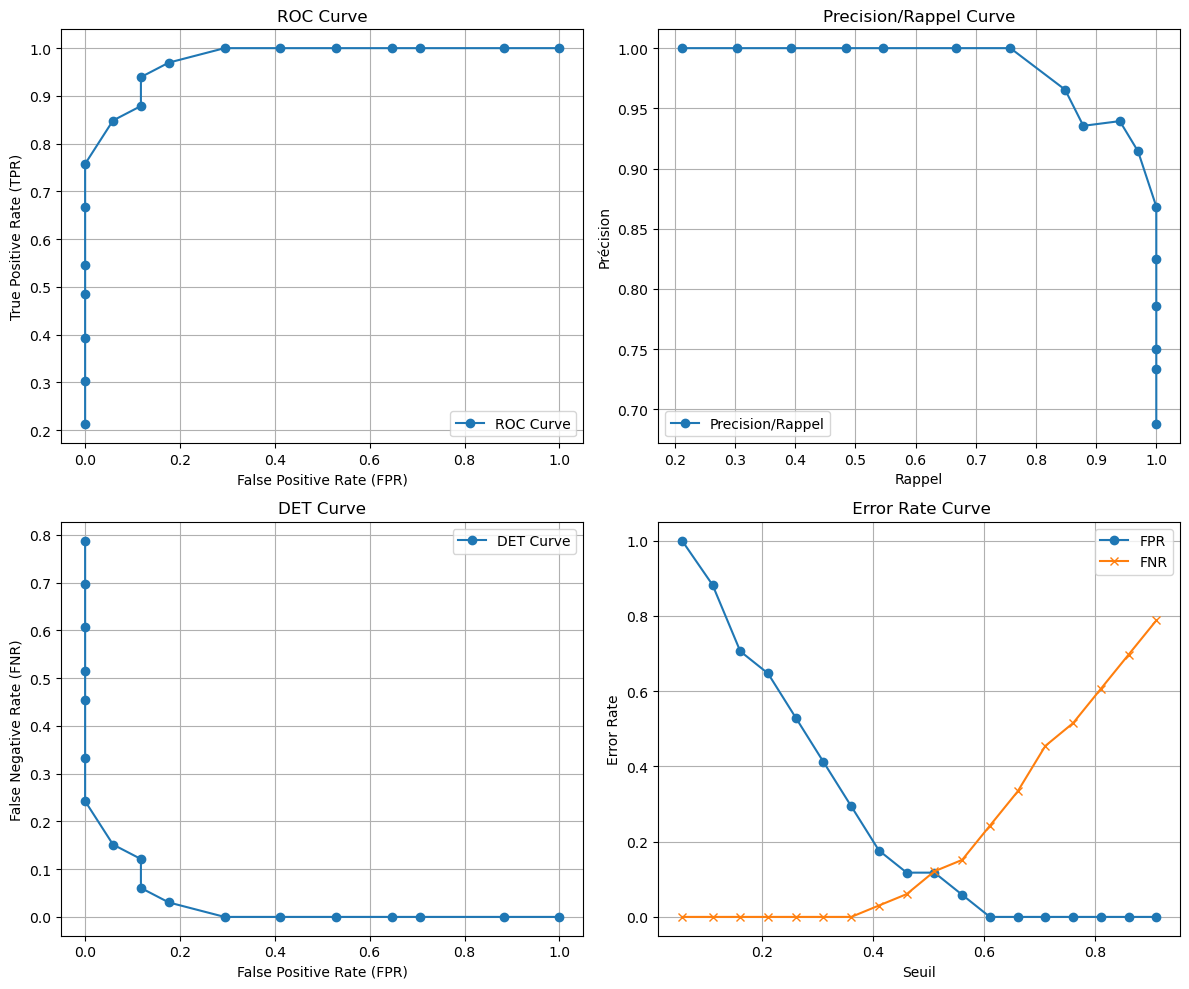

In [684]:
plot_performance_curves(FPR, TPR, rappel, precision, FNR, seuils)


Le point d'intersection est à Seuil = 0.51, Valeur = 0.11764705882352941


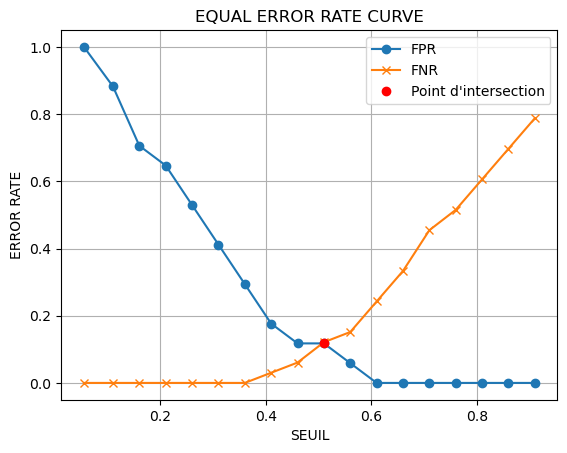

In [685]:


diff = [abs(fpr - fnr) for fpr, fnr in zip(FPR, FNR)]

idx_intersection = diff.index(min(diff))
seuil_intersection = seuils[idx_intersection]
valeur_intersection = FPR[idx_intersection] 

print(f"Le point d'intersection est à Seuil = {seuil_intersection}, Valeur = {valeur_intersection}")

plt.plot(seuils, FPR, marker='o', label="FPR")
plt.plot(seuils, FNR, marker='x', label="FNR")
plt.plot(seuil_intersection, valeur_intersection, 'ro', label="Point d'intersection")

plt.xlabel('SEUIL')
plt.ylabel('ERROR RATE')
plt.title('EQUAL ERROR RATE CURVE')
plt.legend()
plt.grid(True)
plt.show()



In [686]:
print(f"Le point d'intersection est à Seuil = {seuil_intersection}, Valeur = {valeur_intersection}")

Le point d'intersection est à Seuil = 0.51, Valeur = 0.11764705882352941


In [687]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\S7\RECO_form\Score_Sys_1.txt", sep='\s+', header=None)
data.columns = ['Classe', 'score']
print(data)

       Classe  score
0           1  1.355
1           1  2.403
2           1  1.443
3           1  3.125
4           1  1.640
...       ...    ...
18101       1  2.312
18102       1  1.140
18103       1  2.096
18104       1  2.074
18105       1  2.506

[18106 rows x 2 columns]


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7660\3086084442.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(r"C:\Users\DELL\Desktop\S7\RECO_form\Score_Sys_1.txt", sep='\s+', header=None)


In [688]:
c_pos = data[data['Classe'] == 1]['score'].tolist()
c_neg = data[data['Classe'] == -1]['score'].tolist()


In [689]:
len(c_pos)+len(c_neg)

18106

In [690]:
max(c_pos)


6.593

In [691]:
min(c_pos)

-1.968

In [692]:
max(c_neg)

3.094

In [693]:
min(c_neg)

-8.347

In [694]:
TP, FP, TN, FN, seuils = matrices_confusion(c_pos, c_neg,-8,6.6,0.5)

In [695]:
TPR, FPR, FNR, TNR, precision, rappel = rates(TP, FP, TN, FN, c_pos, c_neg)


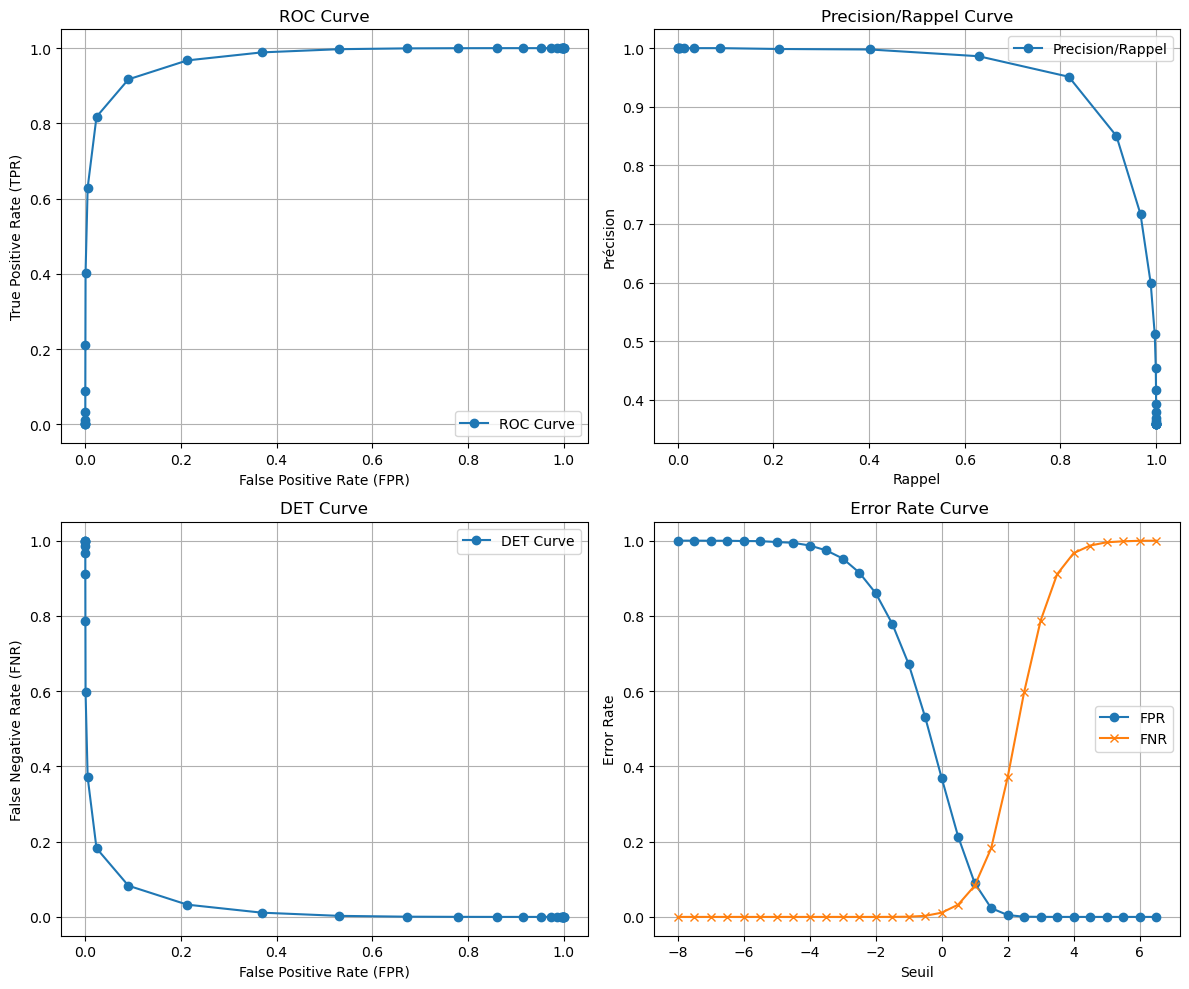

In [696]:
plot_performance_curves(FPR, TPR, rappel, precision, FNR, seuils)


Le point d'intersection est à Seuil = 1.0, Valeur = 0.09012727898176814


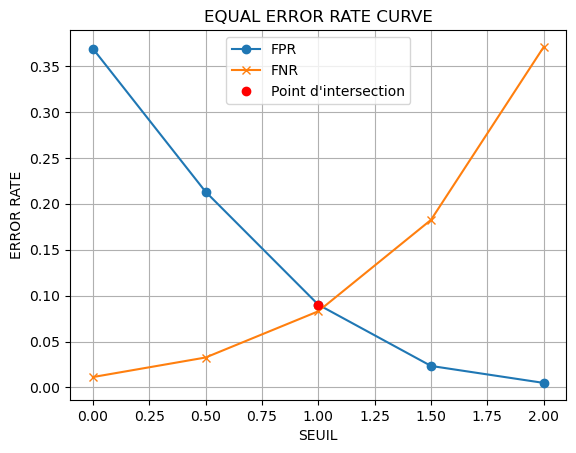

In [697]:
diff = [abs(fpr - fnr) for fpr, fnr in zip(FPR, FNR)]

idx_intersection = diff.index(min(diff))
seuil_intersection = seuils[idx_intersection]
valeur_intersection = FPR[idx_intersection] 

print(f"Le point d'intersection est à Seuil = {seuil_intersection}, Valeur = {valeur_intersection}")

plt.plot(seuils[16:21], FPR[16:21], marker='o', label="FPR")
plt.plot(seuils[16:21], FNR[16:21], marker='x', label="FNR")
plt.plot(seuil_intersection, valeur_intersection, 'ro', label="Point d'intersection")

plt.xlabel('SEUIL')
plt.ylabel('ERROR RATE')
plt.title('EQUAL ERROR RATE CURVE')
plt.legend()
plt.grid(True)
plt.show()

In [698]:
len(seuils)

30

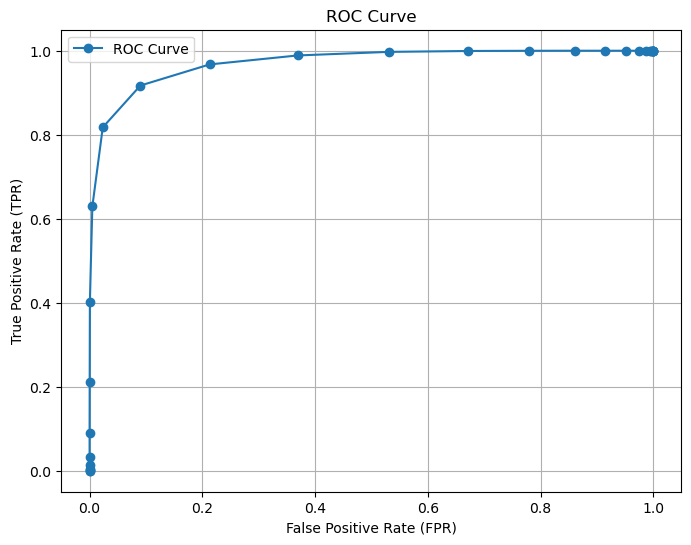

In [699]:
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, marker='o', label="ROC Curve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

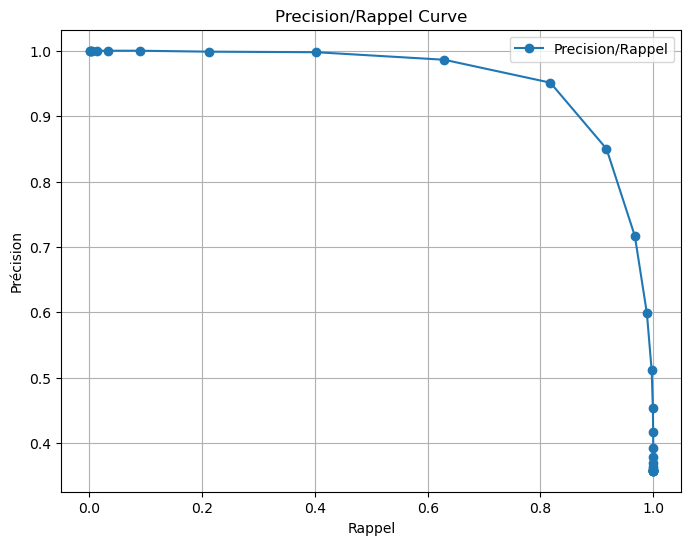

In [726]:
plt.figure(figsize=(8, 6))
plt.plot(rappel[1:], precision[1:], marker='o', label="Precision/Rappel")
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Precision/Rappel Curve')
plt.legend()
plt.grid(True)
plt.show()

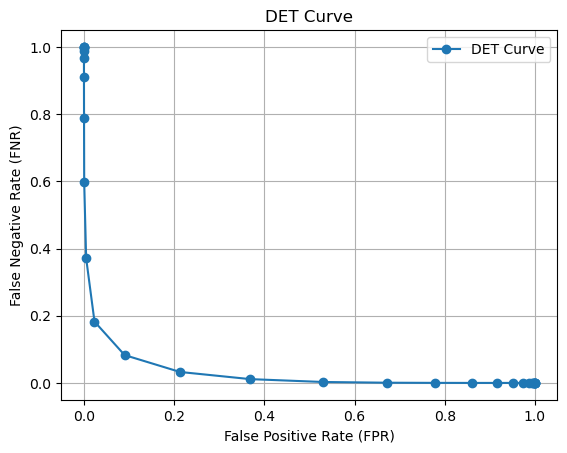

In [728]:
plt.plot(FPR, FNR, marker='o', label="DET Curve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('False Negative Rate (FNR)')
plt.title('DET Curve')
plt.legend()
plt.grid(True)
plt.show()

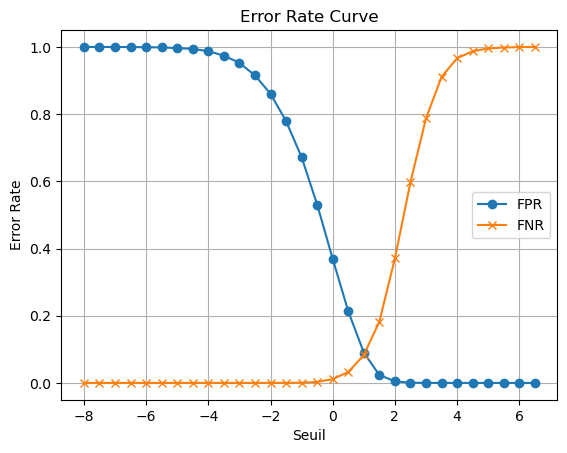

In [730]:
plt.plot(seuils, FPR, marker='o', label="FPR")
plt.plot(seuils, FNR, marker='x', label="FNR")
plt.xlabel('Seuil')
plt.ylabel('Error Rate')
plt.title('Error Rate Curve')
plt.legend()
plt.grid(True)
plt.show()